## Introduction Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- *`CUSTID`* : Identification of Credit Card holder (Categorical)
- *`BALANCE`* : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
- *`BALANCEFREQUENCY`* : Seberapa sering Saldo diperbarui, skor antara `0` dan `1` (1 = frequently updated, 0 = not frequently updated)
- *`PURCHASES`* : Jumlah pembelian yang dilakukan dari akun
- *`ONEOFFPURCHASES`* : Jumlah pembelian maksimum dilakukan dalam sekali jalan
- *`INSTALLMENTSPURCHASES`* : Jumlah pembelian dilakukan secara angsuran
- *`CASHADVANCE`* : Uang tunai di muka yang diberikan oleh pengguna
- *`PURCHASESFREQUENCY`* : Seberapa sering Pembelian dilakukan, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- *`ONEOFFPURCHASESFREQUENCY`* : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = frequently purchased, 0 = not frequently purchased)
- *`PURCHASESINSTALLMENTSFREQUENCY`* : Seberapa sering pembelian secara mencicil (angsuran) dilakukan (1 = frequently done, 0 = not frequently done)
- *`CASHADVANCEFREQUENCY`* : Seberapa sering uang tunai di muka dibayarkan
- *`CASHADVANCETRX`* : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- *`PURCHASESTRX`* : Jumlah transaksi pembelian yang dilakukan
- *`CREDITLIMIT`* : Batas Kartu Kredit untuk pengguna
- *`PAYMENTS`* : Jumlah Pembayaran yang dilakukan oleh pengguna
- *`MINIMUM_PAYMENTS`* : Jumlah minimum pembayaran yang dilakukan oleh pengguna
- *`PRCFULLPAYMENT`* : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- *`TENURE`* : Jangka waktu layanan kartu kredit untuk pengguna

## Menginisialisasikan librari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

## Mendapatakan Dataset

In [2]:
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Membersihkan Data

>***Data Cleansing***: Tahap ini data akan dicek jika data memiliki Value *`NaN`*, maka data tersebut dibersikan

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data[data['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


jumlah data *`NaN:` `314`*. Data tidak dihapus, karena data tersebut berjumlah banyak. 

In [5]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

C:\Users\Thendro\AppData\Local\Temp\ipykernel_7536\1963192550.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dengan begini data dapat di lihat persentase valuenya.

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.shape

(8950, 18)

## Eksplorasi Data

>Data akan dijelajahi untuk divisualisasikan

In [8]:
Vis=data.drop(["CUST_ID"], axis=1)
Vis.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Text(0, 0.5, 'Jumlah minimum pembayaran')

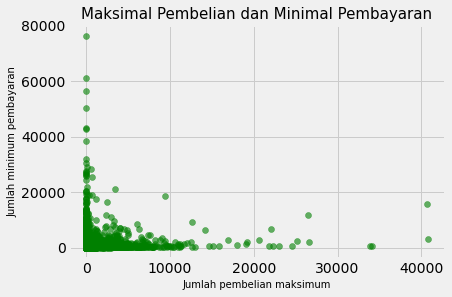

In [115]:
plt.scatter(Vis["ONEOFF_PURCHASES"],Vis["MINIMUM_PAYMENTS"], color='g',marker='o',alpha=0.6)
plt.title('Maksimal Pembelian dan Minimal Pembayaran', fontsize=15)
plt.xlabel('Jumlah pembelian maksimum', fontsize = 10)
plt.ylabel('Jumlah minimum pembayaran', fontsize = 10)

Text(0, 0.5, 'Jumlah pembelian maksimum')

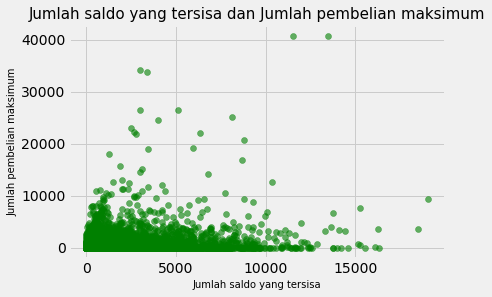

In [116]:
plt.scatter(Vis.BALANCE,Vis["ONEOFF_PURCHASES"], color='g',marker='o',alpha=0.6)
plt.title('Jumlah saldo yang tersisa dan Jumlah pembelian maksimum', fontsize=15)
plt.xlabel('Jumlah saldo yang tersisa', fontsize = 10)
plt.ylabel('Jumlah pembelian maksimum', fontsize = 10)

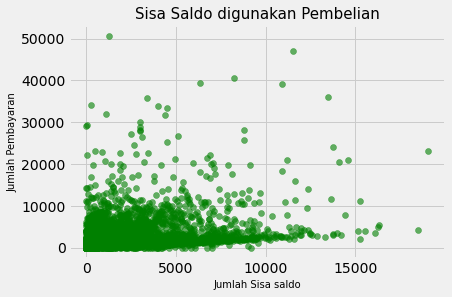

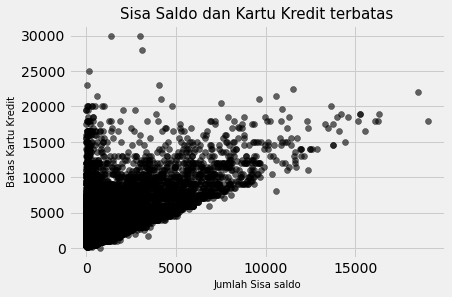

In [117]:
plt.scatter(Vis.BALANCE,Vis["PAYMENTS"], color='g',marker='o',alpha=0.6)
plt.title('Sisa Saldo digunakan Pembelian', fontsize=15)
plt.xlabel('Jumlah Sisa saldo', fontsize = 10)
plt.ylabel('Jumlah Pembayaran', fontsize = 10)
plt.show()

plt.scatter(Vis.BALANCE,Vis["CREDIT_LIMIT"], color='black',marker='o',alpha=0.6)
plt.title('Sisa Saldo dan Kartu Kredit terbatas', fontsize=15)
plt.xlabel('Jumlah Sisa saldo', fontsize = 10)
plt.ylabel('Batas Kartu Kredit', fontsize = 10)
plt.show()

Data yang paling hijau yang tebal menampilkan data rata-rata data customers hanya melakukan pembayaran langsung paling banyak dikisaran dengan sisa 0-100000.

Text(0, 0.5, 'Jumlah transaksi pembelian')

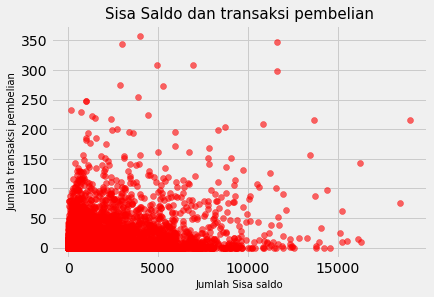

In [118]:
plt.scatter(Vis.BALANCE,data["PURCHASES_TRX"], color='r',marker='o',alpha=0.6)
plt.title('Sisa Saldo dan transaksi pembelian', fontsize=15)
plt.xlabel('Jumlah Sisa saldo', fontsize = 10)
plt.ylabel('Jumlah transaksi pembelian', fontsize = 10)

Text(0, 0.5, 'Jumlah transaksi uang muka')

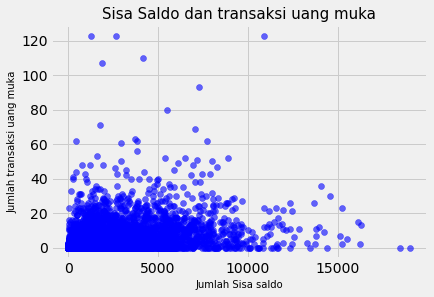

In [119]:
plt.scatter(Vis.BALANCE,data["CASH_ADVANCE_TRX"], color='b',marker='o',alpha=0.6)
plt.title('Sisa Saldo dan transaksi uang muka', fontsize=15)
plt.xlabel('Jumlah Sisa saldo', fontsize = 10)
plt.ylabel('Jumlah transaksi uang muka', fontsize = 10)

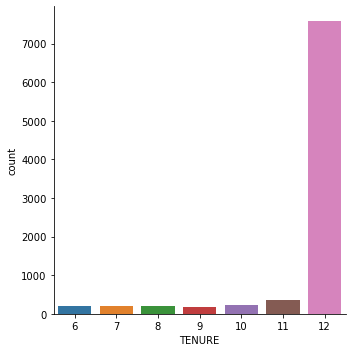

In [18]:
sns.catplot(x = 'TENURE', kind = 'count', data = data)

Terlihat pada gambar layanan 12 bulan lebih banyak pada data kartu kredit

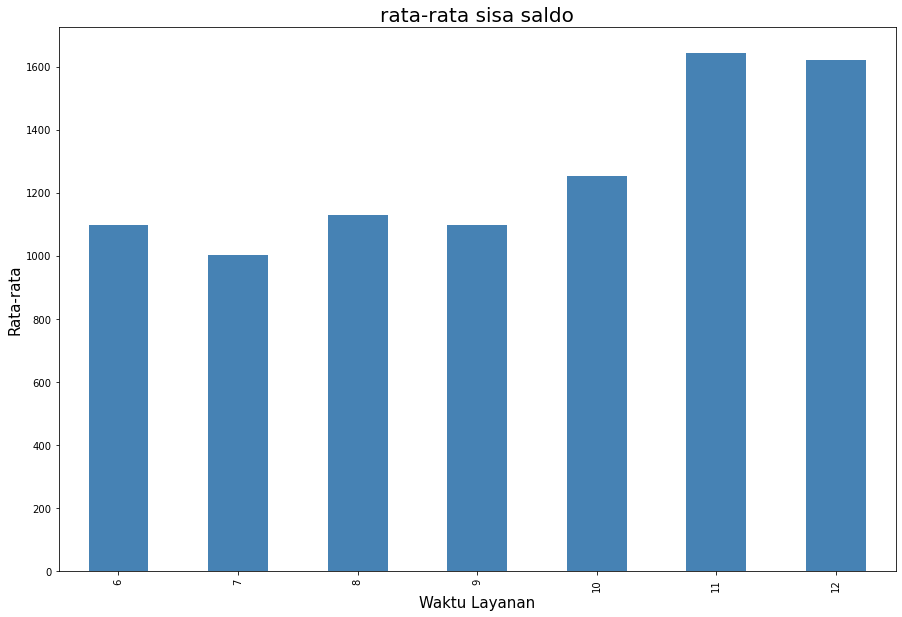

In [14]:
balance = data['BALANCE'].groupby(data['TENURE'], axis=0).mean()

balance.plot(kind='bar', figsize=(15,10), color = 'steelblue')
plt.title('rata-rata sisa saldo berdasarkan layanan', fontsize=20)
plt.xlabel('Waktu Layanan', fontsize = 15)
plt.ylabel('Rata-rata', fontsize = 15)
plt.show()

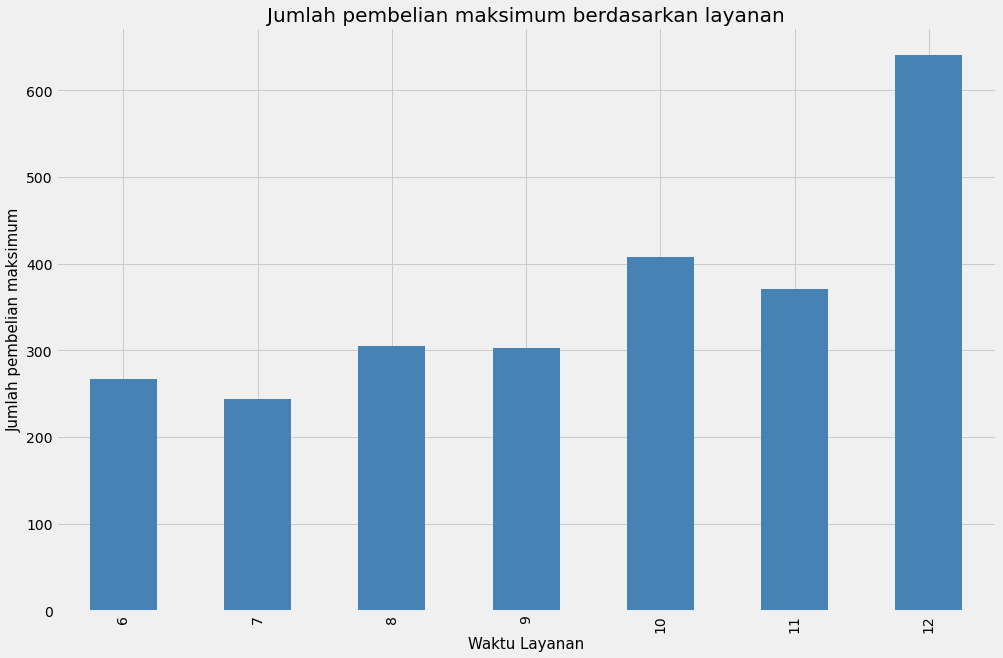

In [120]:
purchases1 = data['ONEOFF_PURCHASES'].groupby(data['TENURE'], axis=0).mean()

purchases1.plot(kind='bar', figsize=(15,10), color = 'steelblue')
plt.title('Jumlah pembelian maksimum berdasarkan layanan', fontsize=20)
plt.xlabel('Waktu Layanan', fontsize = 15)
plt.ylabel('Jumlah pembelian maksimum', fontsize = 15)
plt.show()

In [16]:
Vis.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

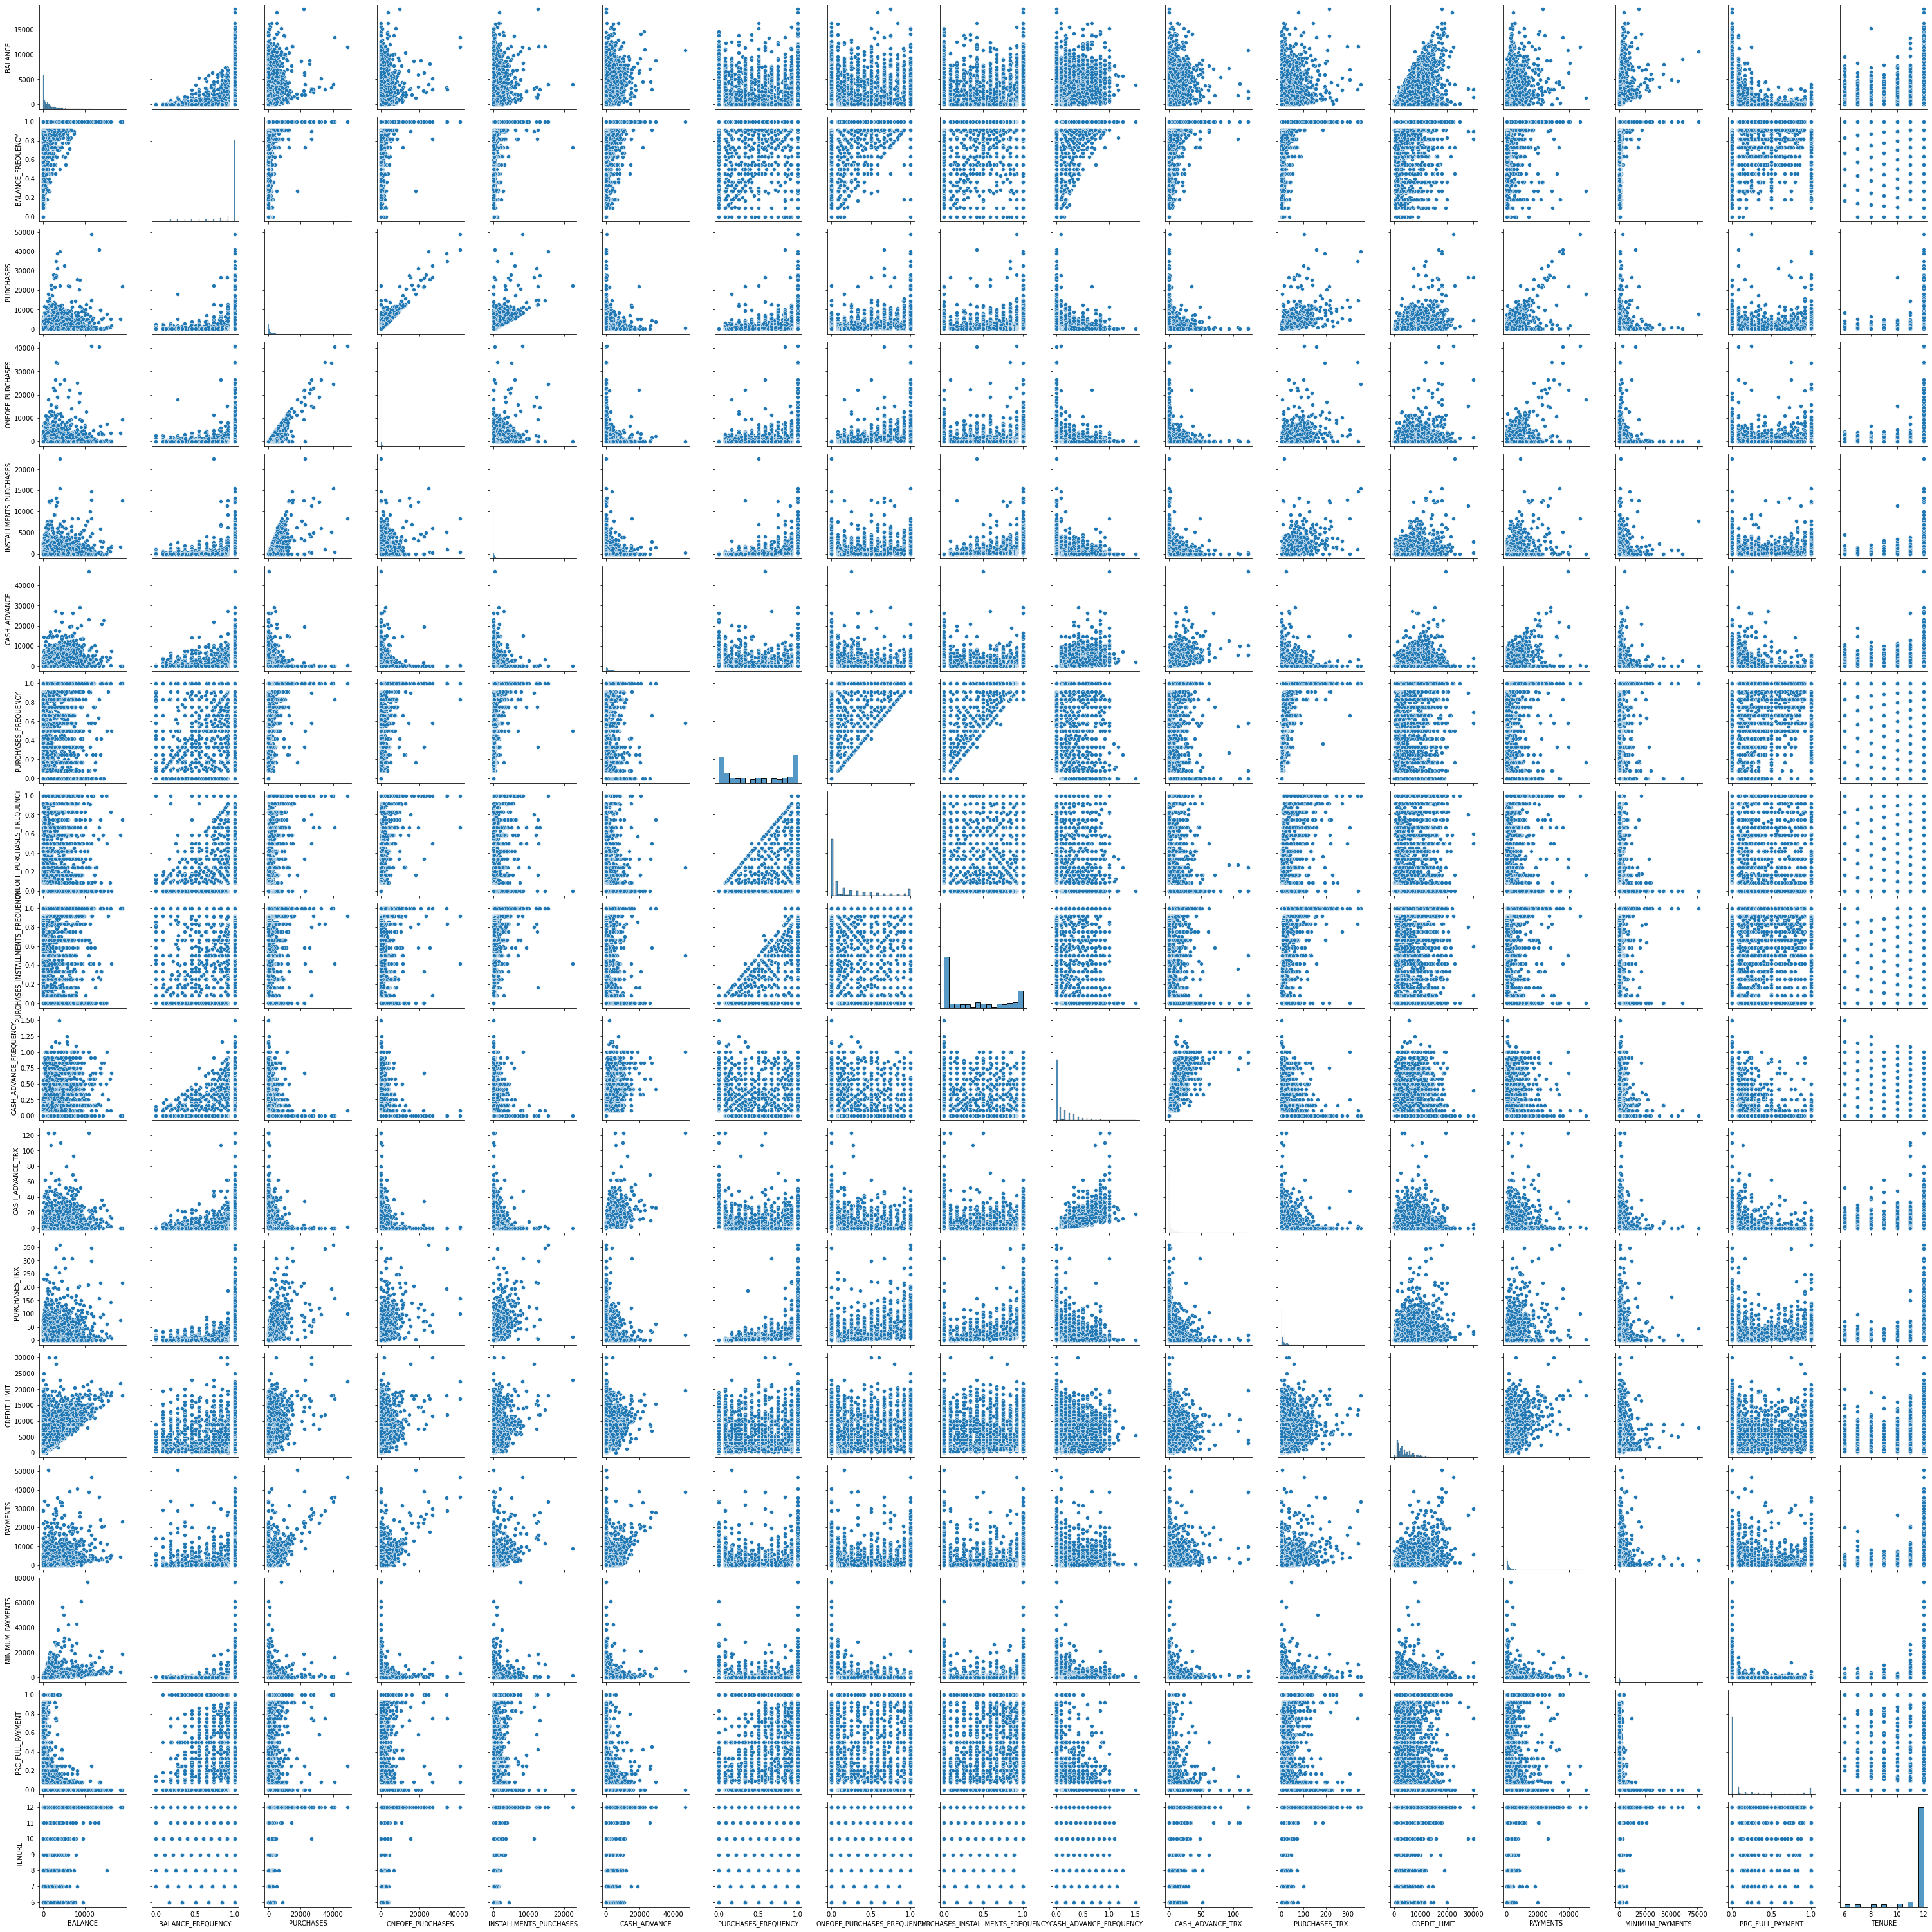

In [17]:
sns.pairplot(Vis)

## Data Preprocessing

In [121]:
Vis.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
X_train=Vis.values
X_train

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

## Pendefisian dan Pelatihan Model
Tahap ini saya akan menggunakan parameter 5 kunci cluster, *`init = 'random'` (random dan iter 5000 untuk mempercepat konvergensi clustering dan maksimum iterasi dalam sekali proses ), `max_iter=500`, dan parameter lainnya bernilai `default`.*

In [76]:
km_model= KMeans(init="random", n_clusters=5, n_init=10, max_iter=500, random_state=42)
y_pred=km_model.fit_predict(X_train)
y_pred

array([1, 3, 4, ..., 1, 1, 1])

In [77]:
data['cluster']=y_pred
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [124]:
print ('Jumlah inertia :',km_model.inertia_)
print ('Jumlah iterasi yang dijalankan :', km_model.n_iter_)

Jumlah inertia : 188460410072.34546
Jumlah iterasi yang dijalankan : 34


In [79]:
km_model.cluster_centers_

array([[2.39464707e+03, 9.32396137e-01, 6.08726727e+03, 4.03946147e+03,
        2.04940889e+03, 7.65107427e+02, 8.73762111e-01, 6.58321624e-01,
        6.77561724e-01, 7.93111211e-02, 2.30412371e+00, 6.90515464e+01,
        9.00000000e+03, 7.26251605e+03, 1.17552836e+03, 3.33124294e-01,
        1.19432990e+01],
       [8.12714522e+02, 8.51940725e-01, 5.23521638e+02, 2.57385282e+02,
        2.66432551e+02, 4.97383072e+02, 4.53773413e-01, 1.33669558e-01,
        3.48568467e-01, 1.10053771e-01, 2.31831939e+00, 9.71995727e+00,
        2.26201383e+03, 9.27262259e+02, 5.98388951e+02, 1.47621151e-01,
        1.13866833e+01],
       [5.84615665e+03, 9.40056813e-01, 2.15160578e+04, 1.69118634e+04,
        4.60419438e+03, 6.06364305e+03, 8.56249969e-01, 7.43750031e-01,
        6.99479125e-01, 1.77083312e-01, 9.96875000e+00, 1.12562500e+02,
        1.55187500e+04, 2.86290979e+04, 3.16355248e+03, 4.51626719e-01,
        1.19375000e+01],
       [6.47471613e+03, 9.77157942e-01, 8.90153706e+02, 5.001

Disini saya akan menggunakan banyak sample kunci dari kmeans untuk mendapatkan jumlah skor terbaik

In [81]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 50,
}

kmeans_cluster= range(3,17)

inertia_data= []
for k in kmeans_cluster:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    tmp=kmeans.inertia_
    inertia_data.append(tmp)
    print("The innertia for : ", k, "Clusters is : ", tmp)

The innertia for :  3 Clusters is :  232806465807.68066
The innertia for :  4 Clusters is :  206824677250.91333
The innertia for :  5 Clusters is :  182318524954.833
The innertia for :  6 Clusters is :  166923837736.76816
The innertia for :  7 Clusters is :  145288982469.59235
The innertia for :  8 Clusters is :  132903197922.01314
The innertia for :  9 Clusters is :  124229495457.26431
The innertia for :  10 Clusters is :  117200799235.80197
The innertia for :  11 Clusters is :  110873188147.19601
The innertia for :  12 Clusters is :  106025253355.16437
The innertia for :  13 Clusters is :  100740542427.47571
The innertia for :  14 Clusters is :  94816096650.62521
The innertia for :  15 Clusters is :  91723119691.19356
The innertia for :  16 Clusters is :  88846486575.23233


C:\Users\Thendro\AppData\Local\Temp\ipykernel_7536\483451845.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(xx,inertia_data,  "bo-",color='green', linewidth=3, markersize=8)


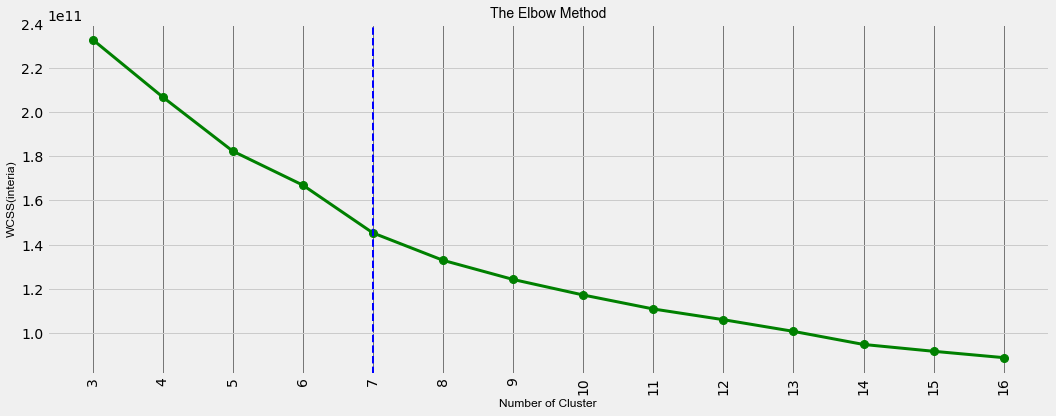

In [113]:
fig,(ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(kmeans_cluster))
ax1.plot(xx,inertia_data,  "bo-",color='green', linewidth=3, markersize=8)
ax1.set_xticks(xx)
plt.grid(which='both',color='black',axis='x',alpha=0.5)
ax1.set_xticklabels(kmeans_cluster, rotation='vertical')
plt.xlabel('Number of Cluster',family='Arial',fontsize=12,color='black')
plt.ylabel('WCSS(interia)',family='Arial',fontsize=12,color='black')
plt.title('The Elbow Method',family='Arial',fontsize=14,color='black')

number_of_clusters=4
plt.axvline(x=number_of_clusters, linewidth=2, color='blue', linestyle='--')

## Silhouette Score

Menampilkan data menggunakan silhouette score

In [83]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_)

0.2857873541359126

In [85]:
# A list holds the silhouette coefficients for each k
silhouette_scores = []

# Notice we start at 2 clusters for silhouette coefficient
for k in kmeans_cluster:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(X_train)
    scores = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(scores)
    
silhouette_scores

[0.46510840738141906,
 0.39813827225952697,
 0.40700301184356363,
 0.35137314358686217,
 0.36976206036670134,
 0.3851830581768592,
 0.35745276206117926,
 0.3615604523077947,
 0.33426618720199136,
 0.2563278128768636,
 0.2847533564348665,
 0.28611376990619597,
 0.2568857203727604,
 0.2857873541359126]

C:\Users\Thendro\AppData\Local\Temp\ipykernel_7536\2489267244.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(xx,silhouette_scores, "bo-",color='#FF7F00', linewidth=3,markersize=8)


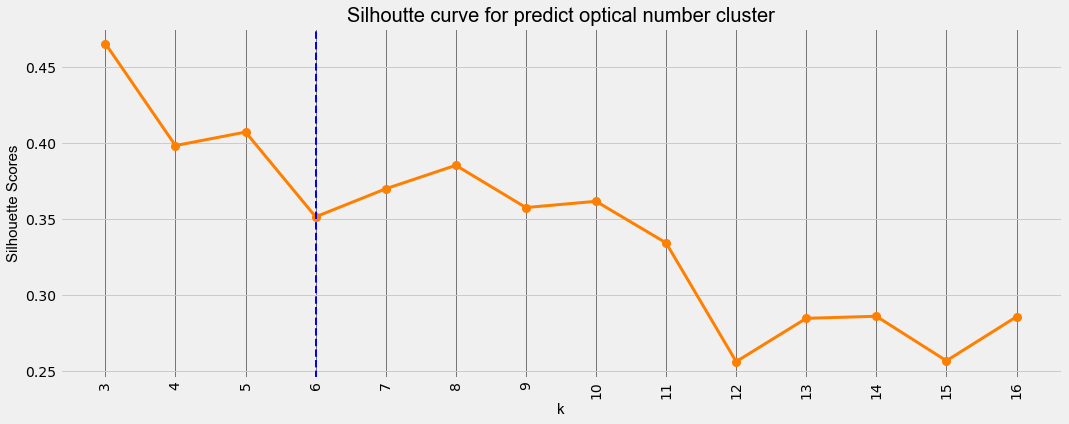

In [128]:
fig,(ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(kmeans_cluster))
ax1.plot(xx,silhouette_scores, "bo-",color='#FF7F00', linewidth=3,markersize=8)
ax1.set_xticks(xx)
plt.grid(which='both',color='black',axis='x',alpha=0.5)
ax1.set_xticklabels(kmeans_cluster, rotation='vertical')
plt.xlabel('k',family='Arial',fontsize=15,color='black')
plt.ylabel('Silhouette Scores',family='Arial',fontsize=15,color='black')
plt.title('Silhoutte curve for predict optical number cluster', family='Arial',fontsize=20,color='black')

number_of_clusters=3
plt.axvline(x=number_of_clusters, linewidth=2, color='blue', linestyle='--')

## Kesimpulan

**Pada Proyek ini, Dataset Pengganaan Kartu kredit memiliki data 9000 pengguna yang terlibat dalam penggunaan kartu kredit. saya menggunakan alogiritma KMEANS untuk melakukan pendekatan klustering. Persentasi terbaik KMeans menghasilkan kunci kluster 7, memberikan jumlah jarak terdekat mencapai *`145288982469.59235`*. Saya juga melakukan pendekatan akurasi yang terbaik denggan menggunakan skor Silhouette. Hasilnya akurasinnya didapatkan dari loop ke *`4` `0.35137314358686217`*.**